In [242]:
import face_recognition 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw
import numpy as np

## Detection

In [243]:
image_name = "fedos_unknown.jpg"
image = face_recognition.load_image_file(image_name)

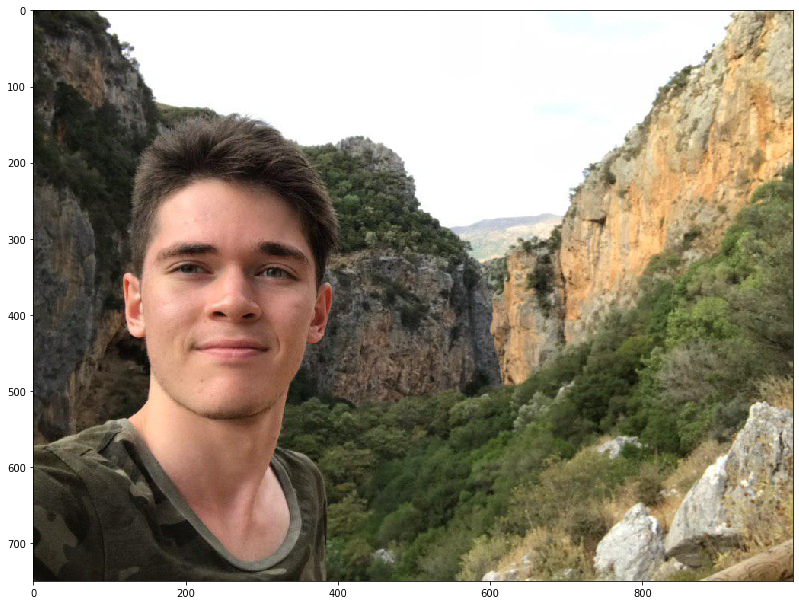

In [244]:
im = np.array(image, dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)
fig.set_size_inches(18.5, 10.5)

# Display the image
ax.imshow(im)
plt.show()


In [245]:
face_locations = face_recognition.face_locations(image)
face_locations

[(266, 365, 489, 142)]

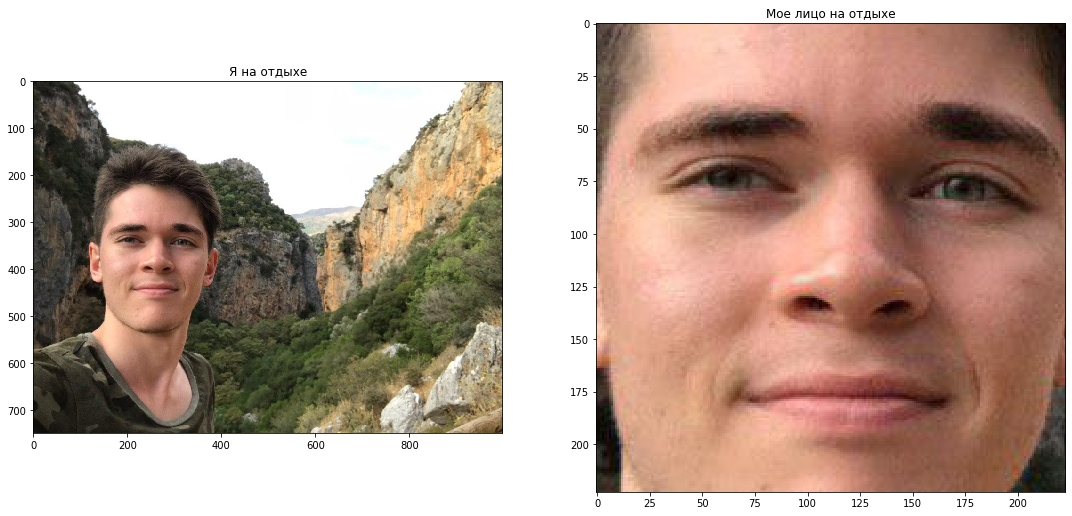

In [246]:
x = face_locations[0][3]
y = face_locations[0][0]
max_x = face_locations[0][1]
max_y = face_locations[0][2]

photo = Image.open(image_name)
cut = photo.crop((x, y, max_x, max_y))

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)

a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(photo)
a.set_title('Я на отдыхе')

a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(cut)
imgplot.set_clim(0.0, 0.7)
a.set_title('Мое лицо на отдыхе')

plt.show()


In [262]:
image_name = "multiply.jpg"
image = face_recognition.load_image_file(image_name)
face_locations1 = face_recognition.face_locations(image)
face_locations2 = face_recognition.face_locations(image, model="cnn")

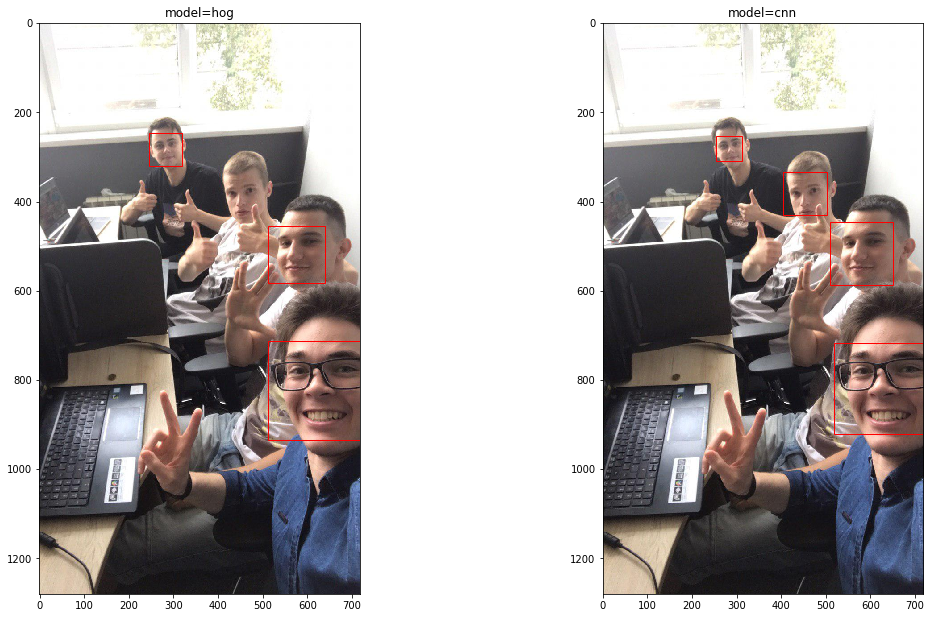

[(712, 719, 935, 513), (454, 640, 583, 511), (246, 320, 320, 245)]
[(253, 312, 310, 255), (333, 503, 431, 405), (446, 650, 588, 509), (718, 719, 922, 519)]


In [267]:
im = np.array(image, dtype=np.uint8)

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)

ax = fig.add_subplot(1, 2, 1)
ax.set_title("model=hog")
ax.imshow(im)
for face in face_locations1:
    x = face[3]
    y = face[0]
    max_x = face[1]
    max_y = face[2]
    rect = patches.Rectangle((x, y), max_x - x, max_y - y, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)


ax = fig.add_subplot(1, 2, 2)
ax.set_title("model=cnn")
ax.imshow(im)
for face in face_locations2:
    x = face[3]
    y = face[0]
    max_x = face[1]
    max_y = face[2]
    rect = patches.Rectangle((x, y), max_x - x, max_y - y, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()

print(face_locations1)
print(face_locations2)

## Recognition

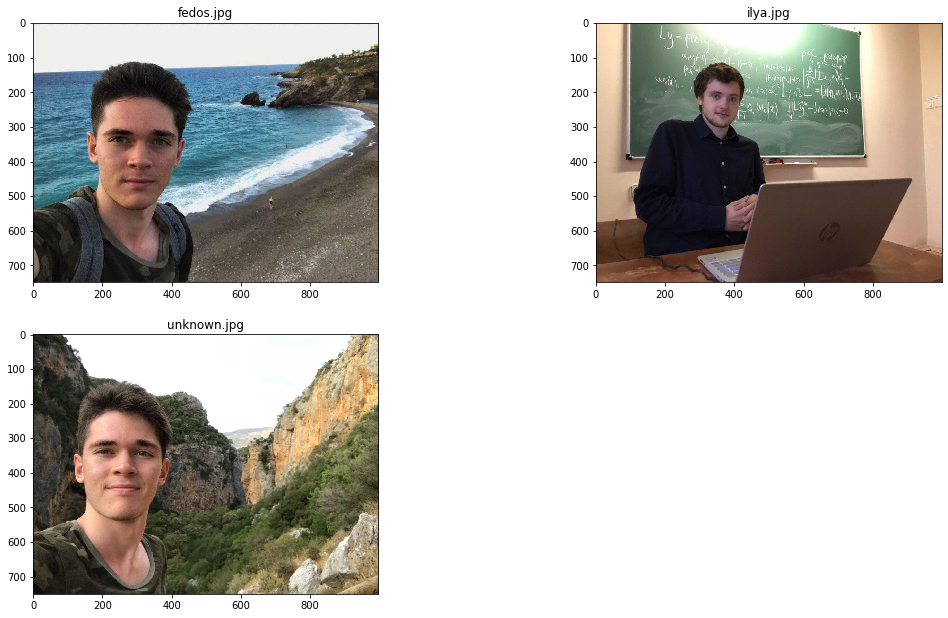

In [251]:
fig = plt.figure()

fig.set_size_inches(18.5, 10.5)

a = fig.add_subplot(2, 2, 1)
imgplot = plt.imshow(Image.open("fedos1.jpg"))
a.set_title('fedos.jpg')

a = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(Image.open("ilya.jpg"))
a.set_title('ilya.jpg')

a = fig.add_subplot(2, 2, 3)
imgplot = plt.imshow(Image.open("fedos_unknown.jpg"))
imgplot.set_clim(0.0, 0.7)
a.set_title('unknown.jpg')

plt.show()

In [252]:
fedos_image = face_recognition.load_image_file("fedos1.jpg")
ilya_image = face_recognition.load_image_file("ilya.jpg")
unknown_image = face_recognition.load_image_file("fedos_unknown.jpg")

try:
    fedos_image_encoding = face_recognition.face_encodings(fedos_image)[0]
    ilya_image_encoding = face_recognition.face_encodings(ilya_image)[0]
    unknown_image_encoding = face_recognition.face_encodings(unknown_image)[0]
except IndexError:
    print("I wasn't able to locate any faces in at least one of the images. Check the image files. Aborting...")
    quit()

known_faces = [
    fedos_image_encoding,
    ilya_image_encoding
]

# results is an array of True/False telling if the unknown face matched anyone in the known_faces array
results = face_recognition.compare_faces(known_faces, unknown_image_encoding)

print("Is the unknown face a picture of Fedos? {}".format(results[0]))
print("Is the unknown face a picture of Ilya? {}".format(results[1]))
print("Is the unknown face a new person that we've never seen before? {}".format(not True in results))

Is the unknown face a picture of Fedos? True
Is the unknown face a picture of Ilya? False
Is the unknown face a new person that we've never seen before? False
